# Modelo de predição de valores de imóveis

'price' = Preço das casas em dólares

'area' = área do terreno

'bedrooms' = número de quartos

'bathrooms' = número de banheiros

'stories' = número de andares

'mainroad' = Se tem acesso à rua principal 

'guestorom' = Se tem quarto de hóspedes

'basement' = Se tem porão 

'hotwaterheating' = Se tem aquecedor de água

'airconditioning' = Se tem ar-condicionado

'parking' = Número de estacionamentos 

'prefarea' = área preferencial

'furnishingstatus' = Se a casa é mobiliada 

o dataset pode ser encontrado em:'https://www.kaggle.com/datasets/yasserh/housing-prices-dataset/data'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Housing 2.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
categoricas = ['mainroad','guestroom', 'basement', 'hotwaterheating',
               'airconditioning', 'prefarea', 'furnishingstatus']

# Análise a ser feita:

1. Correlacao entre as variáveis
2. Distribuição dos valores das casas
3. Relação das variáveis com os preços (gráficos boxplots)
4. Possiveis outliers
5. Normalização

**Antes de realizarmos a análise de correlação, iremos transformar as variáveis categóricas.**

In [7]:
df_dummies = pd.get_dummies(df, categoricas)
df_dummies.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [8]:
df_dummies.head(3)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0


**Removeremos a coluna 'furnishingstatus_furnished' para evitar a multicolinearidade. O sklearn que iremos utilizar
já faz isso por default, mas considero uma boa prática.**

In [9]:
df_numerico = df_dummies.drop('furnishingstatus_furnished', axis=1).copy()
df_numerico.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished'],
      dtype='object')

### Análise de correlação

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

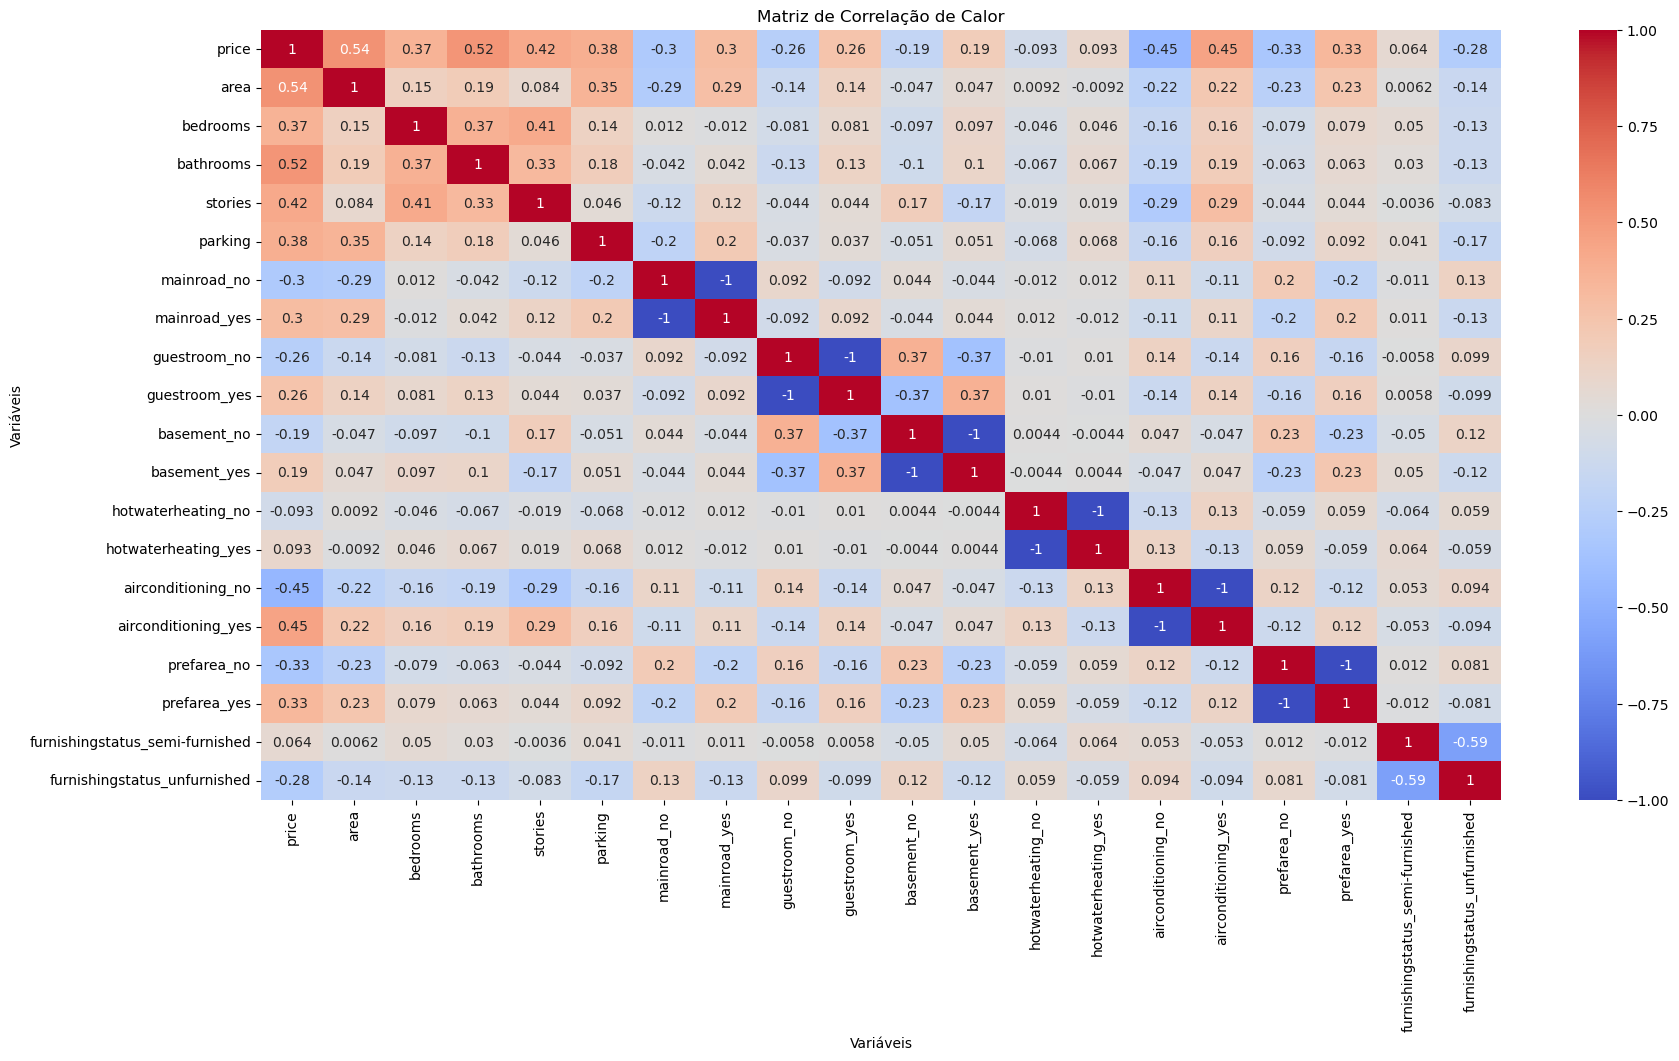

In [11]:
correlacao = df_numerico.corr()
cmap = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize = (20, 10))
sns.heatmap(correlacao, annot = True, cmap=cmap)
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")
plt.title("Matriz de Correlação de Calor")
plt.show()

**As altas correlações que aparecem são das variáveis dummies. Não há mais nenhuma correlação alta.**

### Distribuição dos preços

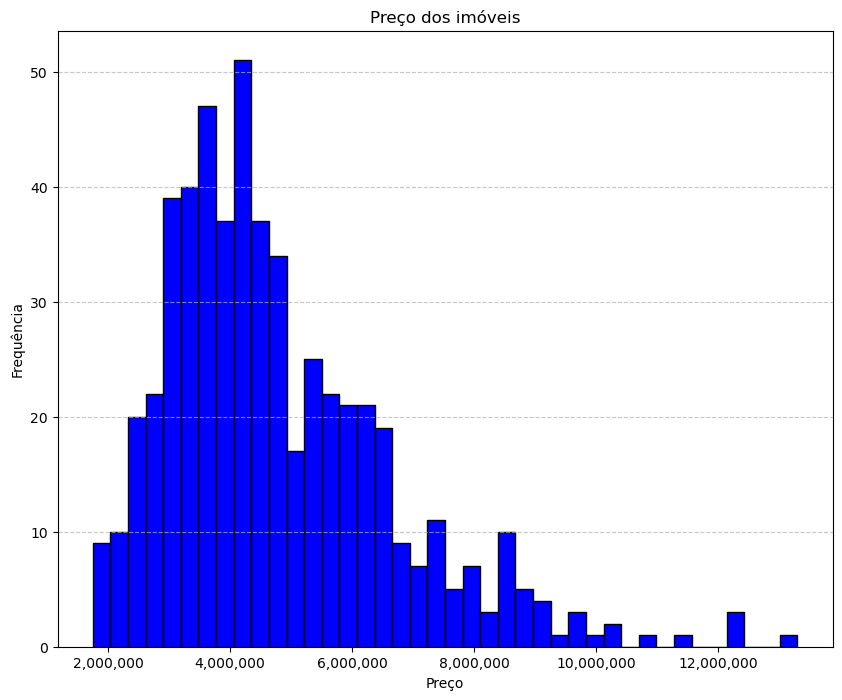

In [12]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 8))
plt.hist(df['price'], bins=40, color='blue', edgecolor='black')
plt.title('Preço dos imóveis')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

**Temos uma distribuição assimétrica à direita.**

### Relações das variáveis com os preços

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='bedrooms', ylabel='price'>

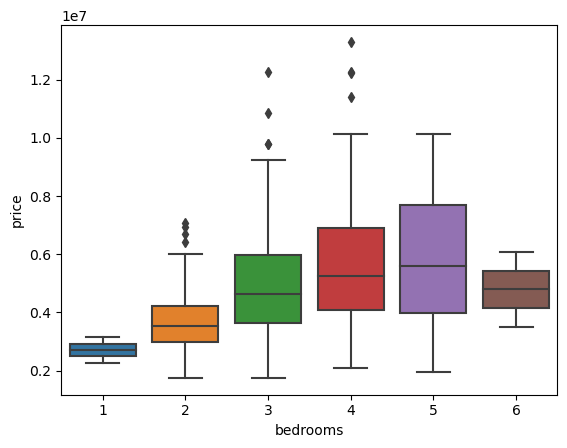

In [14]:
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

**Um fato interessante; como de se esperado, o preço parece maior conforme o número de quartos aumenta.**
**Porém, com 6 quartos o valor parece ter uma caída.**

In [15]:
df.query('bedrooms == 6')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
112,6083000,4300,6,2,2,yes,no,no,no,no,0,no,furnished
395,3500000,3600,6,1,2,yes,no,no,no,no,1,no,unfurnished


In [16]:
df['area'].mean()

5150.54128440367

In [17]:
df['price'].mean()

4766729.247706422

<Axes: xlabel='bathrooms', ylabel='price'>

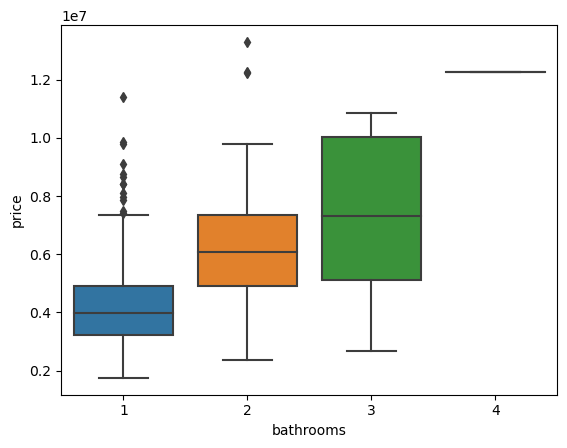

In [18]:
sns.boxplot(x = 'bathrooms', y = 'price', data = df)

In [19]:
df.query('bathrooms == 4')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


**Há apenas um imóvel com 4 banheiros, a explicação de não podermos visualizar o boxplot.**

<Axes: xlabel='stories', ylabel='price'>

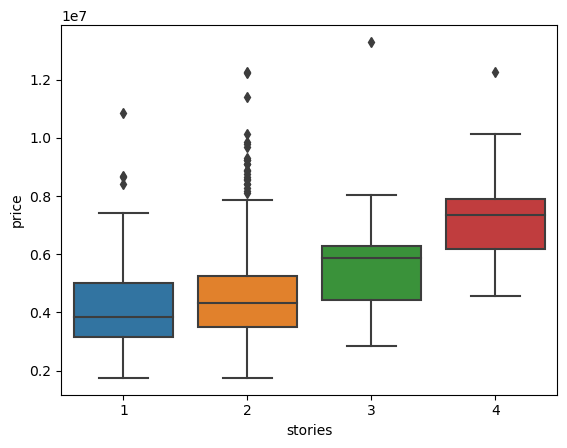

In [20]:
sns.boxplot(x = 'stories', y = 'price', data = df)

<Axes: xlabel='mainroad', ylabel='price'>

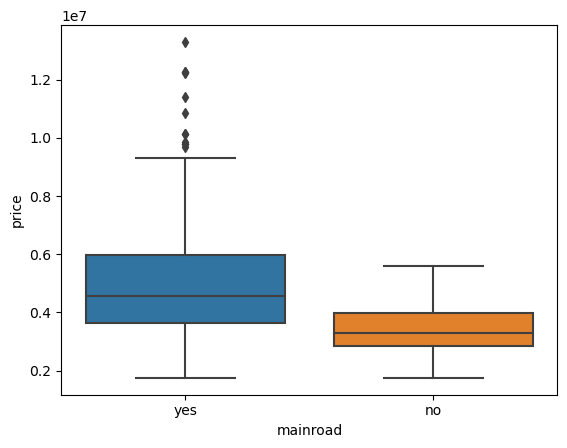

In [21]:
sns.boxplot(x = 'mainroad', y = 'price', data = df)

<Axes: xlabel='guestroom', ylabel='price'>

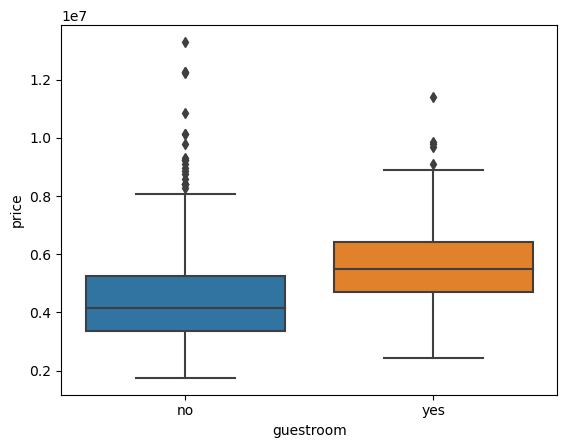

In [22]:
sns.boxplot(x = 'guestroom', y = 'price', data = df)

<Axes: xlabel='basement', ylabel='price'>

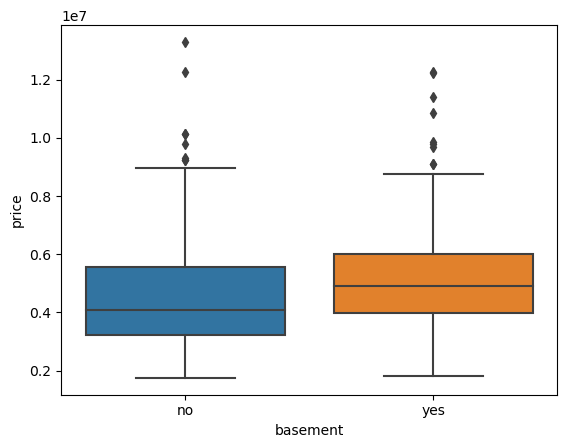

In [23]:
sns.boxplot(x = 'basement', y = 'price', data = df)

In [24]:
df.head(1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished


<Axes: xlabel='hotwaterheating', ylabel='price'>

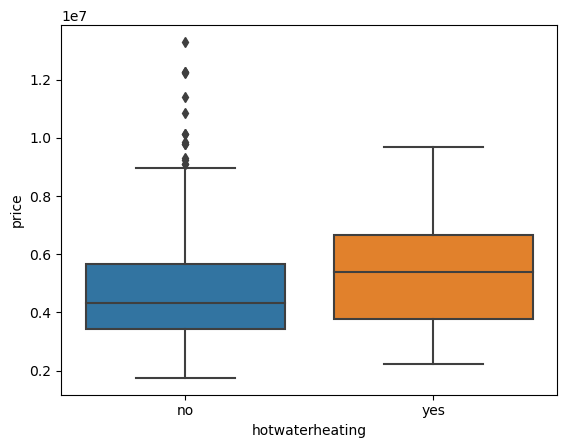

In [25]:
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)

<Axes: xlabel='airconditioning', ylabel='price'>

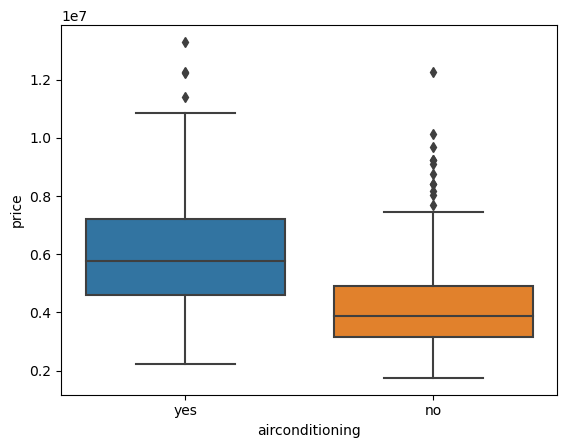

In [26]:
sns.boxplot(x = 'airconditioning', y = 'price', data = df)

<Axes: xlabel='parking', ylabel='price'>

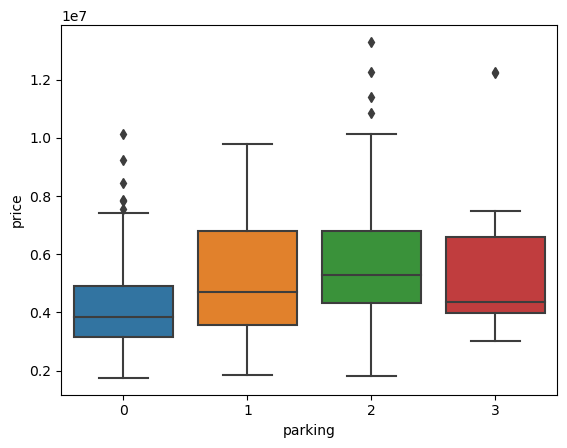

In [27]:
sns.boxplot(x = 'parking', y = 'price', data = df)

**Ao que parece, os valores dos imóveis não parecem mudar tanto em decorrer do número de vagas para estacionar.**

<Axes: xlabel='prefarea', ylabel='price'>

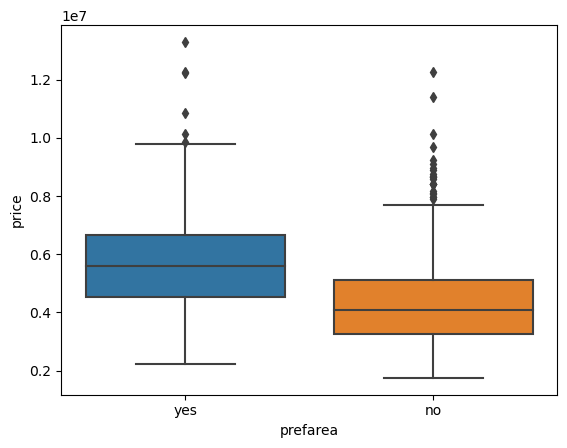

In [28]:
sns.boxplot(x = 'prefarea', y = 'price', data = df)

<Axes: xlabel='furnishingstatus', ylabel='price'>

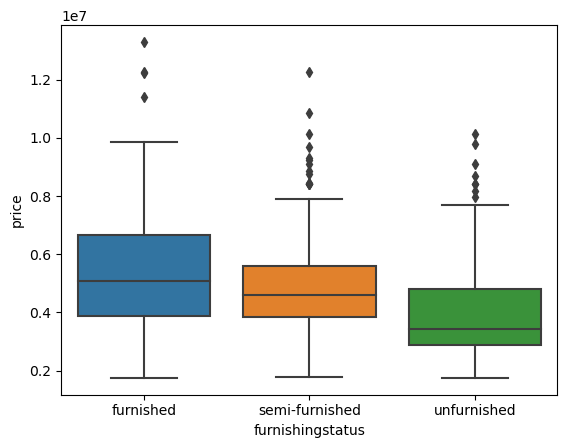

In [29]:
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)

**Pela análise exploratória podemos observar algo esperado.** 
1. O número de quartos tem grande impacto no valor dos imóveis.
2. Quanto mais banheiros, o imóvel também se torna mais caro.
3. Quanto mais andares, mais caro o imóvel. 
4. Quando o imóvel é mobiliado também notamos valores mais altos.

### Possiveis Outliers

<Axes: xlabel='price'>

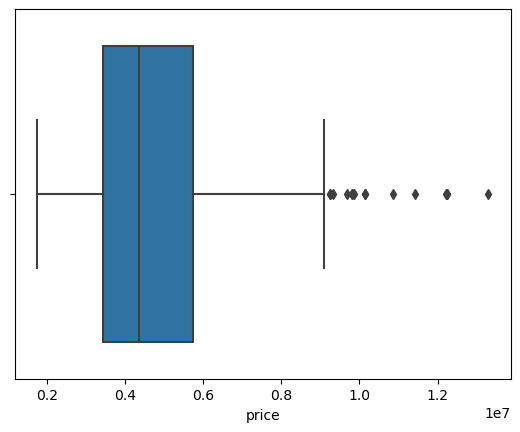

In [30]:
sns.boxplot(x=df['price'])

In [31]:
df.query('price >= 9000000')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


<Axes: xlabel='area'>

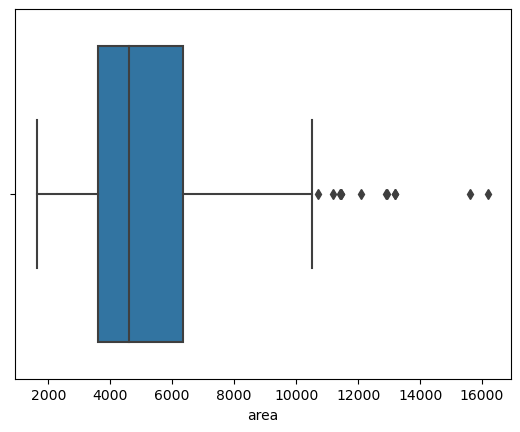

In [32]:
sns.boxplot(x=df['area'])

In [33]:
df.query('area >= 11000')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished


In [34]:
df.shape

(545, 13)

In [35]:
import numpy as np

In [36]:
media_price = np.mean(df_numerico['price'])
std_price = np.std(df_numerico['price'])

limite_superior = media_price + (3 * std_price)
limite_inferior = media_price - (3 * std_price)

outliers = df_numerico[(df_numerico['price'] > limite_superior) | (df_numerico['price'] < limite_inferior)].index

In [37]:
outliers.shape

(6,)

In [38]:
media_area = np.mean(df_numerico['area'])
std_area = np.std(df_numerico['area'])

limite_superior_area = media_area + (3 * std_area)
limite_inferior_area = media_area - (3 * std_area)

outliers_area = df_numerico[(df_numerico['area'] > limite_superior_area) | (df_numerico['area'] < limite_inferior_area)].index

In [39]:
outliers_area.shape

(7,)

In [40]:
df_tratado = df_numerico.drop(outliers).copy()
df_tratado.shape

(539, 20)

In [41]:
df_tratado = df_tratado.drop(outliers_area)
df_tratado.shape

(532, 20)

In [42]:
df_tratado.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.320000e+02,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.00000,532.00000,532.000000,532.000000,532.000000,532.000000
mean,4.657104e+06,5004.043233,2.953008,1.272556,1.804511,0.667293,0.144737,0.855263,0.819549,0.180451,0.652256,0.347744,0.954887,0.045113,0.68985,0.31015,0.770677,0.229323,0.421053,0.330827
std,1.685929e+06,1922.096600,0.733674,0.478304,0.867567,0.843844,0.352166,0.352166,0.384925,0.384925,0.476703,0.476703,0.207747,0.207747,0.46299,0.46299,0.420793,0.420793,0.494193,0.470954
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3535.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,4.291000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,5.600000e+06,6265.500000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,0.000000,1.000000,1.000000
max,1.015000e+07,11460.000000,6.000000,3.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_tratado = df_tratado.reset_index(drop=True)

### Separando os dados

In [44]:
X = df_tratado.drop(['price'], axis = 'columns').copy()
X.head(3)

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,8580,4,3,4,2,0,1,1,0,1,0,1,0,0,1,0,1,1,0
1,8100,4,1,2,2,0,1,0,1,0,1,1,0,0,1,0,1,0,0
2,5750,3,2,4,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1


In [45]:
y = df_tratado['price'].copy()
y.head(3)

0    10150000
1     9870000
2     9800000
Name: price, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [47]:
y_train = y_train.to_frame()

In [48]:
y_train.head()

,price
486,2660000
201,4893000
312,4007500
372,3570000
525,1890000


### Normalizando os dados

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

y_train_norm = scaler.fit_transform(y_train)
y_train_norm = pd.DataFrame(y_train_norm, columns=y_train.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_train_norm = scaler.fit_transform(y_train)

print(y_train_norm)

y_test = y_test.to_frame()
y_test_norm = scaler.fit_transform(y_test)

print(y_test_norm)

In [50]:
X_train.head(3)

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
486,3630,3,3,2,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
201,4995,4,2,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0
312,4500,3,1,2,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0


In [51]:
colunas_norm = ['area', 'bedrooms','bathrooms', 'stories', 'parking']
x_train_cont = X_train[colunas_norm]
scaler.fit(x_train_cont)
X_train[colunas_norm] = scaler.transform(x_train_cont)
print(X_train)

         area  bedrooms  bathrooms   stories   parking  mainroad_no  \
486  0.197746       0.4        1.0  0.333333  0.000000            1   
201  0.337602       0.6        0.5  0.000000  0.000000            0   
312  0.286885       0.4        0.0  0.333333  0.000000            1   
372  0.286885       0.2        0.0  0.000000  0.000000            1   
525  0.199693       0.2        0.0  0.000000  0.000000            0   
..        ...       ...        ...       ...       ...          ...   
129  0.420082       0.4        0.5  1.000000  0.000000            0   
144  0.450820       0.4        0.5  0.000000  0.666667            0   
72   0.901639       0.4        0.5  0.000000  0.333333            0   
235  0.686475       0.6        0.0  1.000000  1.000000            0   
37   0.440574       0.4        0.5  0.666667  0.000000            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
486             0             0              1            1           

In [52]:
x_test_cont = X_test[colunas_norm]
scaler.fit(x_test_cont)
X_test[colunas_norm] = scaler.transform(x_test_cont)
print(X_test)

         area  bedrooms  bathrooms   stories   parking  mainroad_no  \
110  0.665306       0.4        0.0  0.000000  0.666667            0   
244  0.319728       0.4        0.0  0.333333  0.666667            0   
430  0.363265       0.4        0.0  0.000000  0.333333            1   
438  0.693878       0.2        0.0  0.000000  0.000000            0   
233  0.504762       0.4        0.0  0.333333  0.666667            0   
..        ...       ...        ...       ...       ...          ...   
375  0.352381       0.4        0.0  0.333333  0.000000            0   
519  0.183673       0.2        0.0  0.000000  0.000000            1   
370  0.204082       0.4        0.0  0.333333  0.000000            0   
255  0.444898       0.4        0.0  0.333333  0.333333            0   
102  0.360544       1.0        0.5  0.333333  0.000000            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
110             1             0              1            0           

### Escolhendo os modelos e os hiperparâmetros

In [53]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
modelo_elasticnet = ElasticNet()

In [54]:
modelo_elasticnet.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [55]:
param_space_en = {
    'alpha': uniform(0.01, 1.0),
    'l1_ratio': uniform(0.0, 1.0),
    'copy_X': [True, False],
    'fit_intercept': [True, False]
}

elastic_net_rs = RandomizedSearchCV(estimator = modelo_elasticnet, param_distributions = param_space_en,
                                   n_iter = 30, scoring = 'neg_mean_squared_error', cv = 5, random_state = 1)

elastic_net_rs.fit(X_train, y_train)
import numpy as np

mse_abs = abs(elastic_net_rs.best_score_)
rmse = np.sqrt(mse_abs)
print('(RMSE):', rmse)

(RMSE): 1009124.9305414411


In [56]:
elastic_net_rs.best_params_

{'alpha': 0.049054783232882364,
 'copy_X': False,
 'fit_intercept': True,
 'l1_ratio': 0.8781425034294131}

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt_regressor = DecisionTreeRegressor()

In [58]:
dt_regressor.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
param_grid_dt = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random'],
    'min_samples_split': [30, 32, 36, 40, 45],
    'max_depth': [5, 10, 15, 20]
}

dt_regressor_gs = GridSearchCV(estimator = dt_regressor, param_grid = param_grid_dt, cv = 5,
                               scoring = 'neg_mean_squared_error')

dt_regressor_gs.fit(X_train, y_train)
mse_abs = abs(dt_regressor_gs.best_score_)
rmse = np.sqrt(mse_abs)
print('(RMSE):', rmse)

(RMSE): 1162576.9422209437


In [60]:
dt_regressor_gs.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_split': 32,
 'splitter': 'random'}

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

In [62]:
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
param_grid_rf = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'min_samples_split': [2, 5, 10, 12, 14, 16, 18, 20],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [20, 30, 50, 80, 100, 120]
}

rf_regressor_gs = GridSearchCV(estimator = rf_regressor, param_grid =  param_grid_rf, cv = 5,
                              scoring = 'neg_mean_squared_error')

rf_regressor_gs.fit(X_train, y_train.values.ravel())
mse_abs = abs(rf_regressor_gs.best_score_)
rmse = np.sqrt(mse_abs)
print('(RMSE):', rmse)

(RMSE): 1041586.596108351


# Melhor modelo: ElasticNet

In [65]:
elastic_net_final = ElasticNet(alpha= 0.049054783232882364, copy_X = False,
                               fit_intercept = True, l1_ratio = 0.8781425034294131)

elastic_net_final.fit(X_train, y_train)

ElasticNet(alpha=0.049054783232882364, copy_X=False,
           l1_ratio=0.8781425034294131)

In [67]:
y_predict = elastic_net_final.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculando o MSE
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error:', mse)

# Calculando o RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculando o MAE
mae = mean_absolute_error(y_test, y_predict)
print('Mean Absolute Error:', mae)

# Calculando o R-quadrado
r2 = r2_score(y_test, y_predict)
print('R-squared:', r2)


Mean Squared Error: 1020659895557.7666
Root Mean Squared Error: 1010277.137996187
Mean Absolute Error: 753798.2300047785
R-squared: 0.6062927201212267


**A conclusão é a de que o modelo não foi muito bom para prever os valores. Infelizmente, o que nos restou para melhorar a complexidade do modelo seria melhorar a base de dados. Porém, não temos mais informações sobre esses dados, pois foi fornecido pelo Kaggle.**

***Como dica para modelos futuros, teríamos que aumentar a base de dados e talvez trabalhar com algumas combinações de features.***
